In [6]:
import csv
import json
import re

import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
probs = """1MW Houston                 93.8   71.6   56.7   38.6   23.5   15.0   
 1S  Alabama                 97.6   69.8   52.2   35.8   23.4   13.5   
 2W  UCLA                    94.6   71.1   46.5   29.0   17.3   10.6   
 1E  Purdue                  98.3   63.4   36.7   23.5   12.7    6.3   
 2MW Texas                   88.8   60.4   39.8   21.3   11.0    6.0   
 4E  Tennessee               84.1   57.7   32.1   20.7   11.3    5.7   
 4W  Connecticut             80.1   51.1   31.0   16.4    9.0    5.1   
 3W  Gonzaga                 87.0   60.3   30.1   16.6    8.7    4.7   
 2S  Arizona                 87.0   56.4   34.0   16.7    9.0    4.1   
 1W  Kansas                  95.4   60.8   31.6   15.1    7.5    3.8   
 2E  Marquette               83.7   53.2   33.1   16.1    7.7    3.3   
 5W  Saint Mary's            69.3   33.5   17.5    7.9    3.8    1.8   
 6S  Creighton               67.7   39.1   20.0    8.7    4.2    1.7   
 5S  San Diego St.           70.4   45.2   17.4    8.7    4.2    1.7   
 3S  Baylor                  78.3   42.4   20.9    8.8    4.1    1.6   
 3MW Xavier                  85.0   49.3   22.6    9.6    3.8    1.6   
 3E  Kansas St.              78.4   42.9   20.8    8.4    3.3    1.1   
10S  Utah St.                62.4   28.0   14.1    5.6    2.5    0.9   
 6MW Iowa St.                62.3   32.4   14.0    5.6    2.1    0.9   
 5E  Duke                    62.7   26.2   10.8    5.4    2.2    0.8   
 6E  Kentucky                57.3   31.3   14.9    5.9    2.2    0.8   
 9S  West Virginia           51.8   15.7    8.7    4.1    1.8    0.7   
 7MW Texas A&M               57.6   22.9   11.7    4.7    1.7    0.7   
 4MW Indiana                 63.4   37.1   12.2    5.2    1.8    0.7   
 8E  Memphis                 51.2   18.9    8.3    4.2    1.7    0.6   
 8S  Maryland                48.2   14.2    7.7    3.5    1.5    0.6   
 8W  Arkansas                55.5   22.8    9.4    3.5    1.4    0.5   
 4S  Virginia                67.7   32.1    9.9    4.1    1.6    0.5   
 9E  Florida Atlantic        48.8   17.7    7.7    3.8    1.5    0.5   
 7E  Michigan St.            52.6   23.0   11.5    4.3    1.5    0.5   
 9MW Auburn                  54.7   15.9    9.0    3.8    1.3    0.5   
 6W  TCU                     60.8   24.1    8.6    3.4    1.3    0.5   
10W  Boise St.               55.4   16.4    6.7    2.6    0.9    0.3   
10E  USC                     47.4   19.4    9.2    3.2    1.0    0.3   
 5MW Miami FL                55.9   27.3    7.6    2.8    0.8    0.3   
11E  Providence              42.7   20.2    8.1    2.7    0.8    0.2   
 8MW Iowa                    45.3   11.4    5.9    2.2    0.7    0.2   
 9W  Illinois                44.5   16.0    5.9    1.9    0.7    0.2   
10MW Penn St.                42.4   14.1    6.1    2.1    0.6    0.2   
 7W  Northwestern            44.6   11.4    4.1    1.3    0.4    0.1   
 7S  Missouri                37.6   12.5    4.8    1.4    0.5    0.1   
11S  N.C. State              32.3   13.2    4.4    1.2    0.4    0.10  
12MW Drake                   44.1   19.1    4.6    1.5    0.4    0.10  
11MW Mississippi St.         23.0    9.8    3.3    1.0    0.3    0.09  
12E  Oral Roberts            37.3   11.2    3.2    1.2    0.3    0.08  
11W  Nevada                  23.4    7.8    2.3    0.8    0.2    0.07  
13MW Kent St.                36.6   16.5    3.7    1.1    0.3    0.06  
12W  VCU                     30.7    8.8    2.8    0.7    0.2    0.06  
12S  Charleston              29.6   13.4    2.7    0.8    0.2    0.04  
13W  Iona                    19.9    6.6    1.9    0.4    0.1    0.03  
11W  Arizona St.             15.8    4.4    1.1    0.3    0.08   0.02  
11MW Pittsburgh              14.7    5.2    1.4    0.4    0.08   0.02  
13S  Furman                  32.3    9.3    1.4    0.3    0.08   0.01  
13E  Louisiana               15.9    4.9    1.0    0.2    0.05   0.007 
14S  UC Santa Barbara        21.7    5.3    1.1    0.2    0.04   0.005 
14E  Montana St.             21.6    5.6    1.2    0.2    0.03   0.005 
15E  Vermont                 16.3    4.3    1.1    0.2    0.03   0.004 
14W  Grand Canyon            13.0    3.5    0.5    0.09   0.01   0.002 
15S  Princeton               13.0    3.1    0.7    0.1    0.02   0.002 
15MW Colgate                 11.2    2.7    0.6    0.1    0.01   0.001 
14MW Kennesaw St.            15.0    3.4    0.5    0.06   0.008  <.001 
16MW Northern Kentucky        6.2    1.1    0.2    0.03   0.003  <.001 
15W  UNC Asheville            5.4    1.0    0.1    0.01   0.002  <.001 
16S  Texas A&M Corpus Chris   2.2    0.3    0.04   0.004  <.001  <.001 
16W  Howard                   4.6    0.4    0.03   0.002  <.001  <.001 
16E  Texas Southern           1.1    0.04   0.001  <.001  <.001  <.001 
16S  Southeast Missouri St.   0.3    0.01   <.001  <.001  <.001  <.001 
16E  Fairleigh Dickinson      0.6    0.01   <.001  <.001  <.001  <.001 """
frprobs = dict((t.strip(), float(p)) for t, p in re.findall("[E|W|S]\s*(.*?)(\d+\.\d)", probs))
frprobs[:4]

{'Houston': 93.8,
 'Alabama': 97.6,
 'UCLA': 94.6,
 'Purdue': 98.3,
 'Texas': 88.8,
 'Tennessee': 84.1,
 'Connecticut': 80.1,
 'Gonzaga': 87.0,
 'Arizona': 87.0,
 'Kansas': 95.4,
 'Marquette': 83.7,
 "Saint Mary's": 69.3,
 'Creighton': 67.7,
 'San Diego St.': 70.4,
 'Baylor': 78.3,
 'Xavier': 85.0,
 'Kansas St.': 78.4,
 'Utah St.': 62.4,
 'Iowa St.': 62.3,
 'Duke': 62.7,
 'Kentucky': 57.3,
 'West Virginia': 51.8,
 'Texas A&M': 57.6,
 'Indiana': 63.4,
 'Memphis': 51.2,
 'Maryland': 48.2,
 'Arkansas': 55.5,
 'Virginia': 67.7,
 'Florida Atlantic': 48.8,
 'Michigan St.': 52.6,
 'Auburn': 54.7,
 'TCU': 60.8,
 'Boise St.': 55.4,
 'USC': 47.4,
 'Miami FL': 55.9,
 'Providence': 42.7,
 'Iowa': 45.3,
 'Illinois': 44.5,
 'Penn St.': 42.4,
 'Northwestern': 44.6,
 'Missouri': 37.6,
 'N.C. State': 32.3,
 'Drake': 44.1,
 'Mississippi St.': 23.0,
 'Oral Roberts': 37.3,
 'Nevada': 23.4,
 'Kent St.': 36.6,
 'VCU': 30.7,
 'Charleston': 29.6,
 'Iona': 19.9,
 'Arizona St.': 15.8,
 'Pittsburgh': 14.7,
 'Fur

In [19]:
bracket = json.load(open("bracket23.json"))
rd1 = [(bracket[region][str(seed)], bracket[region][str(17-seed)]) for seed in range(1,9) for region in ['east', 'south', 'midwest', 'west']]
rd1, len(rd1)

([('Purdue', 'Texas Southern'),
  ('Alabama', 'Texas A&M Corpus Christi'),
  ('Houston', 'Northern Kentucky'),
  ('Kansas', 'Howard'),
  ('Marquette', 'Vermont'),
  ('Arizona', 'Princeton'),
  ('Texas', 'Colgate'),
  ('UCLA', 'UNC Asheville'),
  ('Kansas St.', 'Montana St.'),
  ('Baylor', 'UC Santa Barbara'),
  ('Xavier', 'Kennesaw St.'),
  ('Gonzaga', 'Grand Canyon'),
  ('Tennessee', 'Louisiana'),
  ('Virginia', 'Furman'),
  ('Indiana', 'Kent St.'),
  ('Connecticut', 'Iona'),
  ('Duke', 'Oral Roberts'),
  ('San Diego St.', 'Charleston'),
  ('Miami FL', 'Drake'),
  ("Saint Mary's", 'VCU'),
  ('Kentucky', 'Providence'),
  ('Creighton', 'N.C. State'),
  ('Iowa St.', 'Mississippi St.'),
  ('TCU', 'Arizona St.'),
  ('Michigan St.', 'USC'),
  ('Missouri', 'Utah St.'),
  ('Texas A&M', 'Penn St.'),
  ('Northwestern', 'Boise St.'),
  ('Memphis', 'Florida Atlantic'),
  ('Maryland', 'West Virginia'),
  ('Iowa', 'Auburn'),
  ('Arkansas', 'Illinois')],
 32)

In [28]:
kenpom = {t['TeamName']: t for t in list(csv.DictReader(open("kenpom23.csv")))}
data = [(a, b, float(kenpom[a]['AdjEM']) - float(kenpom[b]['AdjEM']), frprobs[a]) for a, b in rd1]
data

[('Purdue', 'Texas Southern', 34.456360000000004, 98.3),
 ('Alabama', 'Texas A&M Corpus Christi', 27.137496, 97.6),
 ('Houston', 'Northern Kentucky', 29.34515, 93.8),
 ('Kansas', 'Howard', 26.34594, 95.4),
 ('Marquette', 'Vermont', 16.40085, 83.7),
 ('Arizona', 'Princeton', 18.033559999999998, 87.0),
 ('Texas', 'Colgate', 19.31653, 88.8),
 ('UCLA', 'UNC Asheville', 26.131870000000003, 94.6),
 ('Kansas St.', 'Montana St.', 12.540949999999999, 78.4),
 ('Baylor', 'UC Santa Barbara', 13.323730000000001, 78.3),
 ('Xavier', 'Kennesaw St.', 16.07777, 85.0),
 ('Gonzaga', 'Grand Canyon', 18.30949, 87.0),
 ('Tennessee', 'Louisiana', 16.4878, 84.1),
 ('Virginia', 'Furman', 8.02309, 67.7),
 ('Indiana', 'Kent St.', 5.418099999999999, 63.4),
 ('Connecticut', 'Iona', 13.677800000000001, 80.1),
 ('Duke', 'Oral Roberts', 5.194599999999998, 62.7),
 ('San Diego St.', 'Charleston', 8.5356, 70.4),
 ('Miami FL', 'Drake', 2.4029999999999987, 55.9),
 ("Saint Mary's", 'VCU', 9.5065, 69.3),
 ('Kentucky', 'Provi

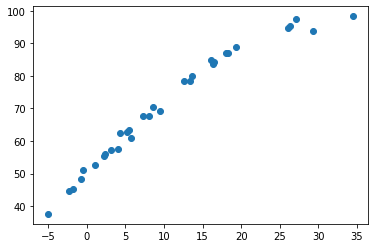

In [29]:
diffs = [x[2] for x in data]
winProb = [x[3] for x in data]
plt.scatter(diffs, winProb)

In [30]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
# the function to fit
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

In [41]:
popt, pcov = curve_fit(func, diffs, winProb)

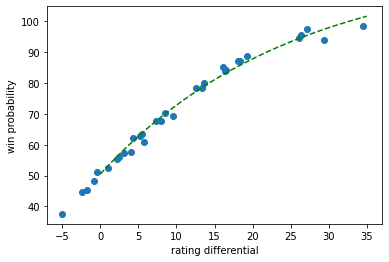

In [32]:
plt.scatter(diffs, winProb)
xvals = np.linspace(0, 35, 100)
plt.plot(xvals, func(xvals, *popt), 'g--', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.xlabel('rating differential')
plt.ylabel('win probability')
plt.show()

In [42]:
popt

array([-6.80512162e+01,  3.96407147e-02,  1.18560240e+02])

last year it was: `array([-0.66888151,  0.04322173,  1.16116838])`

```
-68.0512162 * exp(rating_differential * 0.0396407147) + 118.56024
```

In [40]:
list(map(lambda x: round(x, 2), popt))

[-68.05, 0.04, 118.56]